## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

## Gathering Information

In [2]:
#import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_df = pd.read_csv("kc_house_data.csv") 

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
raw_df.isna().sum().sort_values(ascending = False).head()

yr_renovated    3842
waterfront      2376
view              63
sqft_lot15         0
date               0
dtype: int64

In [6]:
raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Cleaning

### ToDo for Cleaning:
<p> date --> datetimeformat </p>
<p> condition --> probably category </p>
<p> grade --> search for drescription </p>
<p> waterfront  --> deal with null values , probably categorical </p>
<p> view  --> deal with NaN values , search description, a lot of nulls in there </p>

### Transformation

In [7]:
cleaned_df = raw_df.copy()

#cleaned_df.sqft_basement=cleaned_df.sqft_basement.apply(lambda x: float(x))

### sqft_Basement

In [8]:
#see the problem
cleaned_df.sqft_basement.value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [9]:
#replace "?" with placeholder and convert to Numbers
cleaned_df.loc[raw_df.sqft_basement == "?", "sqft_basement"] = 99999
cleaned_df.sqft_basement= cleaned_df.sqft_basement.apply(lambda x: float(x))

#set the placeholdervalues to the median
median = cleaned_df.loc[cleaned_df.sqft_basement != 99999, "sqft_basement"].median()
cleaned_df.loc[cleaned_df.sqft_basement == 99999, "sqft_basement"] = median

### yr_renovated

In [14]:
cleaned_df.yr_renovated.isna().sum()

3842

In [15]:
#Transform NaN Values to zeros and keep them for now.
cleaned_df.yr_renovated.fillna(value=0, inplace=True)

<b>Be aware ! Placeholders (0.0) are still present</b>

### view

In [21]:
cleaned_df.view.isna().sum()

63

In [22]:
#Transform NaN Values to zeros and keep them for now.
cleaned_df.view.fillna(value=0, inplace=True)

### waterfront

In [25]:
cleaned_df.waterfront.isna().sum()

2376

In [26]:
cleaned_df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [27]:
#Columns could be dropped entirely, because there are just a few rows with actual data
#Transform NaN Values to zeros and keep them for now.
cleaned_df.waterfront.fillna(value=0, inplace=True)

## Data Exploration

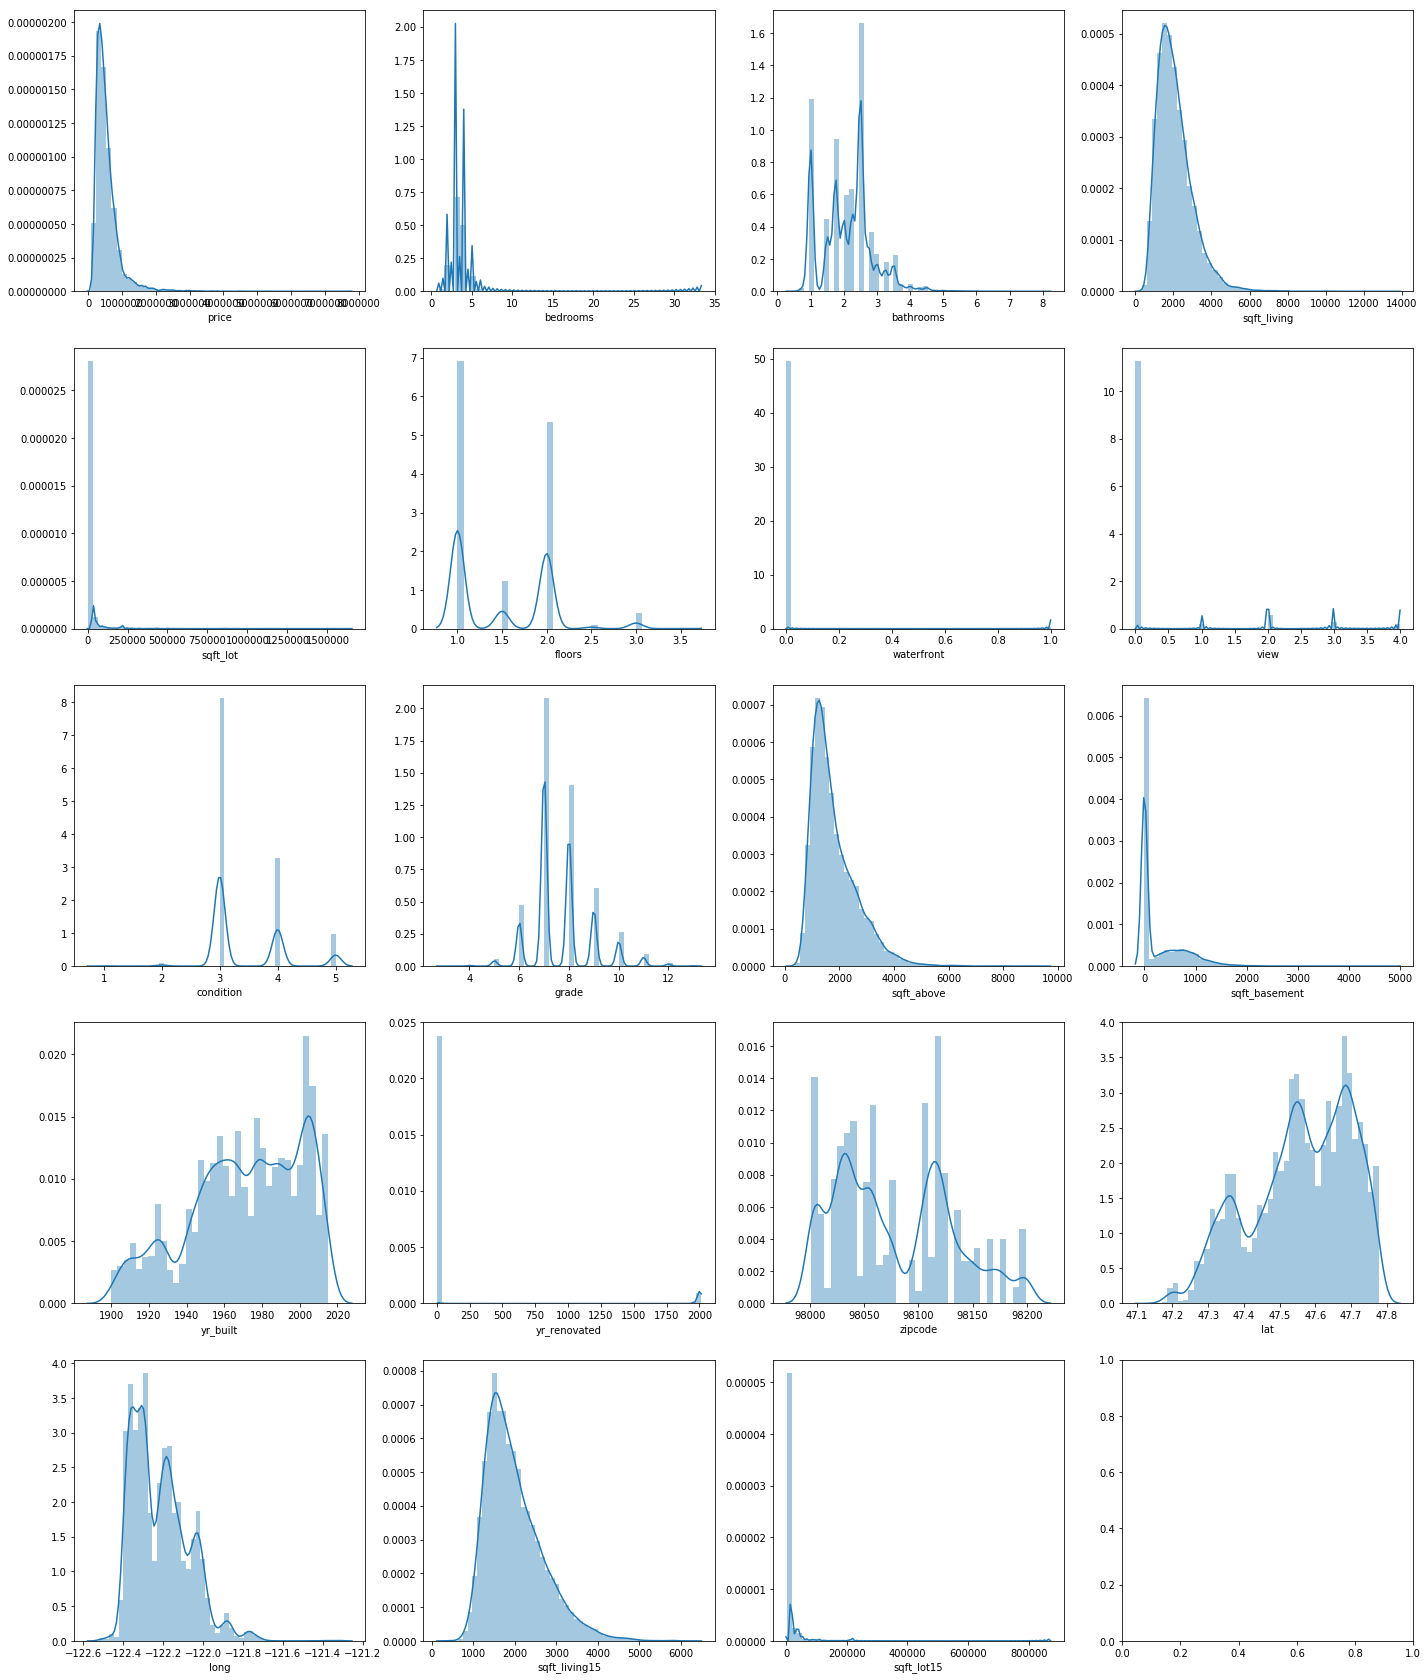

In [11]:
df=cleaned_df
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(24,30))
for n,c in enumerate(df.columns[2:]):
    row = n//4
    col = n%4
    ax = axes[row][col]
    sns.distplot(df[c], ax=ax)